# Emotion Classification (text vs audio)


### Introduction

Artificial intelligence is increasingly used to interpret human emotion in areas where communication plays a critical role—such as healthcare, governance, and public leadership. Many of these systems rely on a single input modality, typically either text or speech, to detect emotional cues. However, emotion is a multimodal phenomenon, conveyed not just through words but also through tone, pacing, and emphasis. This project addresses the question:

"How do text-based and speech-based models interpret the same emotional message differently?"

Using political speeches as the core dataset—rich in rhetorical and emotional expression—we compare AI model predictions from both text transcripts and speech audio. This work seeks to understand what emotional nuance is preserved, lost, or transformed when only one modality is used, with broader implications for emotion-aware AI in global communication, governance, and social technologies.

### Problem Statement

In political discourse, the way a message is delivered can be just as important—if not more so—than the words themselves. A leader may speak words of unity while delivering them in a cold, monotone voice, or express defiance with carefully chosen polite phrasing delivered in a passionate, energized tone. This distinction between what is said (text) and how it is said (speech) poses a unique challenge for emotion classification systems.

Most current emotion detection models are unimodal—they analyze either text or speech, not both. As a result, these models risk misinterpreting emotional intent if they lack access to vocal cues like pitch, emphasis, or rhythm. This limitation is particularly significant in political speeches, where emotional messaging is a tool for persuasion, leadership, and public mobilization.

If AI models fail to recognize these nuances, they may misclassify emotional tone, overlook persuasive intent, or fail to detect deeper sentiment behind diplomatic language. This raises key questions about the design of emotion-aware systems and how different input modalities shape emotional interpretation.

By comparing predictions from text-based and speech-based models on the same political segments, this project explores the extent to which emotional interpretation varies by modality—and what that means for designing emotionally intelligent technologies in high-stakes communication environments.

### Methodology

We selected three publicly available speeches by global leaders:

Javier Milei (Argentina) – UN General Assembly (Ideological/Economic)

Ursula von der Leyen (EU) – COP28 Climate Summit (Environmental)

Dr. Tedros Adhanom Ghebreyesus (WHO) – WHO Executive Board (Healthcare)

Each speech was collected in two formats: full audio/video and official transcript, allowing for paired multimodal analysis.


1. SamLowe/roberta-base-go_emotions

A transformer model based on RoBERTa and fine-tuned on Google’s GoEmotions dataset. This dataset contains 27 nuanced emotions plus a neutral label.

Why it was used: It supports multi-label classification, meaning it can detect multiple emotions in a single segment (e.g., sadness + fear).

How it worked: The model output probabilities for each emotion, and we applied a threshold (e.g., 0.5) to determine which labels were considered present.

2. j-hartmann/emotion-english-distilroberta-base

A smaller and faster DistilRoBERTa model trained on the same GoEmotions dataset.

Difference from baseline: Unlike the SamLowe model, this one outputs a single most likely emotion for each input, offering a simpler and more focused classification.

Purpose: It allowed us to see how model size and architecture affect interpretation of emotional tone.

3. Sentiment Analysis and Lexicon Based Emotion

Used cardiffnlp/twitter-roberta-base-sentiment to classify the overall sentiment of each segment as positive, negative, or neutral. This model is based on RoBERTa and trained on a large dataset of tweets, making it suitable for detecting the general emotional tone of informal and formal text. incorporated the NRCLex library, based on the NRC Emotion Lexicon, which maps words to eight core emotions (anger, fear, joy, trust, sadness, disgust, surprise, anticipation) and two sentiment labels (positive, negative).

Why it was used: Lexicon methods provide a rule-based, interpretable benchmark. They don’t require training and are useful for highlighting differences between statistical models and dictionary lookups.



# Ideological and Economic (Javier Milei)

In his 2024 speech at the United Nations General Assembly, Argentine President Javier Milei delivers a passionate and ideologically charged critique of collectivism and global institutions that, in his view, perpetuate its values. He argues that Argentina has suffered for over a century under collectivist policies—such as socialism, statism, and economic interventionism—which he claims have led to poverty, stagnation, and social decay. Presenting himself as a non-traditional politician and a libertarian economist, Milei positions Argentina’s new direction as a bold break from the past. He defends capitalism as the only system capable of fostering true freedom, prosperity, and innovation, insisting that individual liberty and limited government are essential for national success. Throughout his speech, he warns that international frameworks like the UN’s Agenda 2030 promote dangerous collectivist ideologies on a global scale. By framing Argentina as a model for ideological resistance and economic reform, Milei calls on other nations to reject these ideas and embrace liberty, concluding with his signature phrase: “¡Viva la libertad, carajo!” (“Long live freedom, damn it!”). His tone throughout is assertive and unapologetically combative, signaling a radical shift in Argentina’s role on the world stage.

## Text Emotion Classification

#### SamLowe/roberta-base-go_emotions

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [4]:
# Load the speech transcript
with open('milei_speech.txt', 'r', encoding='utf-8') as file:
    speech_text = file.read()

In [5]:
# Split speech into paragraphs
segments = speech_text.split('\n\n')  # Adjust the delimiter as needed

In [6]:
import torch
import torch.nn.functional as F

# Get model's label mappings
id2label = model.config.id2label

results = []

for segment in segments:
    if segment.strip():  # Ensure the segment is not empty
        # Tokenize the segment
        inputs = tokenizer(segment, return_tensors="pt", truncation=True, padding=True)
        # Get model predictions
        with torch.no_grad():
            logits = model(**inputs).logits
        # Apply sigmoid to get probabilities
        probs = F.sigmoid(logits.squeeze())
        # Filter labels with probability above a certain threshold (e.g., 0.5)
        threshold = 0.5
        predicted_labels = [id2label[i] for i, prob in enumerate(probs) if prob > threshold]
        # Store results
        results.append({
            'Segment': segment,
            'Predicted Emotions': predicted_labels,
            'Emotion Probabilities': {id2label[i]: prob.item() for i, prob in enumerate(probs)}
        })

# Display results
for result in results:
    print(f"Segment: {result['Segment']}")
    print(f"Predicted Emotions: {result['Predicted Emotions']}")
    print(f"Emotion Probabilities: {result['Emotion Probabilities']}")
    print('-' * 50)


Segment: To the authorities of the United Nations, to the representatives of the various countries that make up the United Nations and to all the citizens of the world who are watching us, good afternoon. and to all the citizens of the world who are watching us, good afternoon: for those who do not know, I am not a politician, I am an economist, a libertarian liberal economist, who has never had the ambition to be a politician. I am an economist, a liberal libertarian economist, who has never had the ambition to be a politician and who was who was honored with the position of President of the Argentine Republic, in the face of the resounding failure of more than a century of collectivist policies. a century of collectivist policies that destroyed our country.
This is my first speech -- in front of the United Nations General Assembly -- and I would like to take this opportunity to -- with humility -- alert the various nations of the world to the path they have been treading for decades 

#### j-hartmann/emotion-english-distilroberta-base

In [25]:

# Load the DistilRoBERTa-based emotion model
emotion_model_name = "j-hartmann/emotion-english-distilroberta-base"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)

# Get emotion label map
id2label = emotion_model.config.id2label
label_list = list(id2label.values())

# Emotion classification function using DistilRoBERTa
def get_distilroberta_emotions(texts):
    results = []
    for text in texts:
        inputs = emotion_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            logits = emotion_model(**inputs).logits
        probs = torch.nn.functional.softmax(logits, dim=-1).numpy()[0]
        top_emotion = label_list[np.argmax(probs)]
        result = {
            "text": text,
            "top_emotion": top_emotion
        }
        for label, prob in zip(label_list, probs):
            result[label] = round(prob, 4)
        results.append(result)
    return pd.DataFrame(results)

# Run DistilRoBERTa on Javier speech
javier_emotion_df = get_distilroberta_emotions(javier_segments)

# Preview
print("Javier Transcript Emotion Output:")
display(javier_emotion_df.head())


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

Javier Transcript Emotion Output:


,text,top_emotion,anger,disgust,fear,joy,neutral,sadness,surprise
0,"To the authorities of the United Nations, to t...",neutral,0.0192,0.0125,0.0041,0.4118,0.5014,0.0224,0.0286
1,This is my first speech -- in front of the Uni...,fear,0.0186,0.0136,0.5352,0.0317,0.3751,0.0197,0.0061
2,I do not come here to tell the world what to d...,fear,0.0078,0.0099,0.9547,0.0017,0.0199,0.0034,0.0026
3,Under the tutelage of this organization and th...,surprise,0.0673,0.0166,0.3275,0.0607,0.0468,0.0070,0.4741
4,All this did not make the scourge of war disap...,neutral,0.0545,0.0572,0.0124,0.1820,0.6670,0.0184,0.0085


#### Sentiment Analysis

In [7]:
!pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=57af4672f187051f697c6b1393fb5c888b73e3eb53c59eeb04a3c03d6f892635
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built nrclex


In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from nrclex import NRCLex
import torch
import pandas as pd
import numpy as np
from collections import Counter

# Load Javier Transcript
with open("milei_speech.txt", "r", encoding="utf-8") as file:
    javier_transcript = file.read()

# Segment transcript into meaningful chunks
javier_segments = [seg.strip() for seg in javier_transcript.split("\n") if len(seg.strip()) > 30]

# Load sentiment analysis model (3-class)
sentiment_model_name = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name)
sentiment_labels = ['negative', 'neutral', 'positive']

# Sentiment analysis function
def get_sentiment_scores(texts):
    scores = []
    for text in texts:
        inputs = sentiment_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            logits = sentiment_model(**inputs).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1).numpy()[0]
        sentiment = sentiment_labels[np.argmax(probabilities)]
        scores.append({
            "text": text,
            "negative": round(probabilities[0], 3),
            "neutral": round(probabilities[1], 3),
            "positive": round(probabilities[2], 3),
            "sentiment": sentiment
        })
    return pd.DataFrame(scores)

# Lexicon-based emotion function
def get_nrc_emotions(texts):
    import nltk  # Import nltk here

    # Download required NLTK data
    nltk.download('punkt_tab', quiet=True)  # Download punkt_tab data, suppress download messages
    nltk.download('punkt', quiet=True)      # Download punkt data, suppress download messages

    results = []
    for text in texts:
        emotion_obj = NRCLex(text)
        raw_scores = emotion_obj.raw_emotion_scores
        top_emotions = emotion_obj.top_emotions
        result = {
            "text": text,
            "raw_scores": raw_scores,
            "top_emotions": top_emotions
        }
        result.update(Counter(raw_scores))
        results.append(result)
    return pd.DataFrame(results)

# Run both analyses
javier_sentiment_df = get_sentiment_scores(javier_segments)
javier_lexicon_df = get_nrc_emotions(javier_segments)

# Merge dataframes on text segment
javier_combined_df = pd.merge(javier_sentiment_df, javier_lexicon_df, on="text")

# Preview the combined data
javier_combined_df.head()


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


,text,negative_x,neutral,positive_x,sentiment,raw_scores,top_emotions,anticipation,joy,positive_y,surprise,trust,negative_y,disgust,fear,sadness,anger
0,"To the authorities of the United Nations, to t...",0.460,0.426,0.114,negative,"{'anticipation': 4, 'joy': 4, 'positive': 6, '...","[(positive, 0.2)]",4.0,4.0,6.0,2.0,4.0,4.0,1.0,2.0,2.0,1.0
1,This is my first speech -- in front of the Uni...,0.187,0.637,0.176,neutral,"{'positive': 5, 'anticipation': 2, 'trust': 2,...","[(positive, 0.2631578947368421)]",2.0,2.0,5.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN
2,I do not come here to tell the world what to d...,0.245,0.599,0.156,neutral,"{'anticipation': 5, 'positive': 10, 'trust': 9...","[(positive, 0.2631578947368421)]",5.0,2.0,10.0,3.0,9.0,3.0,1.0,2.0,1.0,2.0
3,Under the tutelage of this organization and th...,0.032,0.391,0.577,positive,"{'positive': 7, 'trust': 6, 'anticipation': 2,...","[(positive, 0.28)]",2.0,3.0,7.0,1.0,6.0,2.0,1.0,1.0,NaN,2.0
4,All this did not make the scourge of war disap...,0.134,0.529,0.337,neutral,"{'anger': 2, 'fear': 4, 'negative': 3, 'sadnes...","[(trust, 0.2631578947368421)]",5.0,6.0,6.0,NaN,10.0,3.0,NaN,4.0,2.0,2.0


### Evaluation Analysis (needs work)

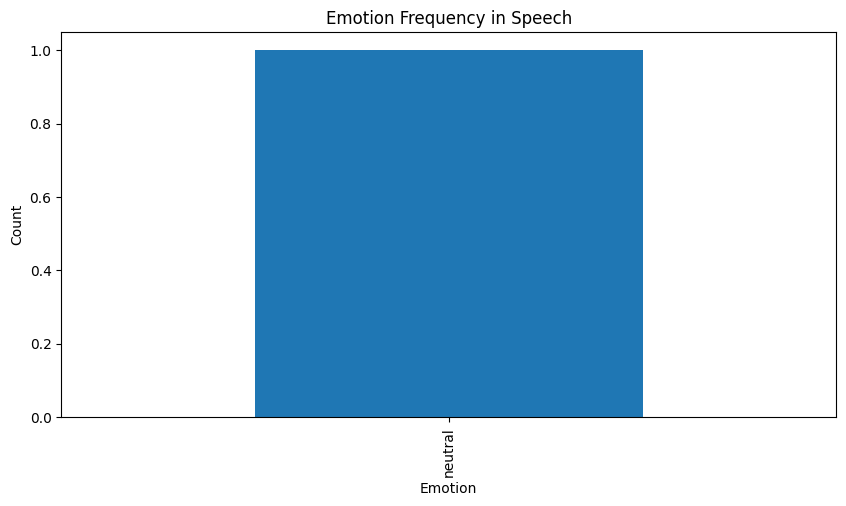

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame
df = pd.DataFrame(results)

# Extract the most probable emotion for each segment
df['Top Emotion'] = df['Emotion Probabilities'].apply(lambda x: max(x, key=x.get) if x else None)

# Now you can use 'Top Emotion' column for plotting
emotion_counts = df['Top Emotion'].value_counts()
emotion_counts.plot(kind='bar', figsize=(10, 5), title="Emotion Frequency in Speech")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

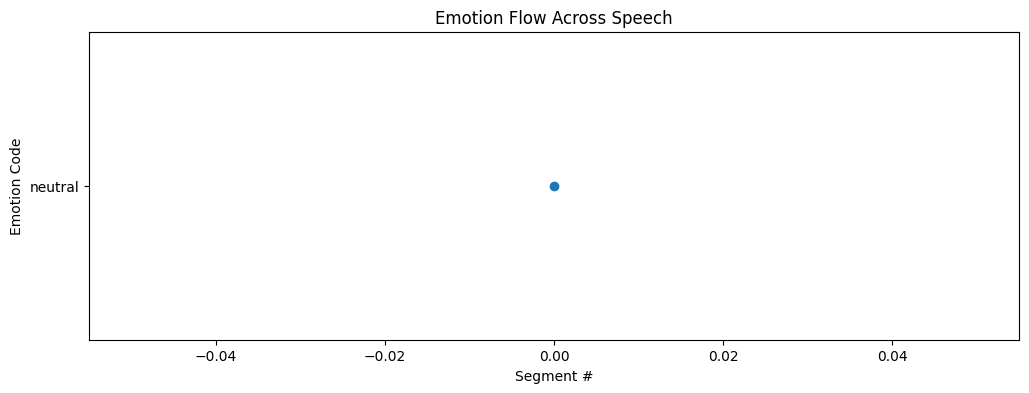

In [ ]:
# Plot emotions across segments
df['Segment #'] = range(len(df))
# Convert 'Top Emotion' to categorical and assign numerical codes
df['Top Emotion Code'] = pd.Categorical(df['Top Emotion']).codes

# Plot using the numerical codes
df.set_index('Segment #')['Top Emotion Code'].plot(marker='o', title="Emotion Flow Across Speech", figsize=(12, 4))
plt.ylabel("Emotion Code") # Update y-axis label
plt.yticks(df['Top Emotion Code'].unique(), df['Top Emotion'].unique()) # Set y-ticks to original emotion labels
plt.show()


# Environmental (Ursula von der Leyen)

In her 2023 speech at the COP28 Climate Summit in Dubai, European Commission President Ursula von der Leyen delivers a focused and forward-looking address centered on urgent global action against climate change. Emphasizing the disproportionate role of energy production—responsible for 75% of global greenhouse gas emissions—she calls on the international community to commit to tripling renewable energy capacity and doubling energy efficiency by 2030. Framing these goals as both achievable and essential, von der Leyen highlights the dramatic reduction in the cost of solar energy as proof that sustainable development is within reach. She stresses the importance of collective accountability, advocating for quantifiable, measurable targets to ensure real progress. Her speech is grounded in pragmatism and optimism, positioning the European Union as a leader in the global green transition. Rather than warning of catastrophe, von der Leyen presents climate action as an opportunity for innovation, economic growth, and shared responsibility. Her tone is assertive yet diplomatic, appealing to both urgency and hope as she urges world leaders to unite around a transformative energy agenda for the planet’s future.

## Text Emotion Classification


#### SamLowe/roberta-base-go_emotions

In [11]:
with open("von_der_leyen_cop28.txt", "r", encoding="utf-8") as file:
    transcript = file.read()


In [12]:
segments = [seg.strip() for seg in transcript.split("\n") if len(seg.strip()) > 30]

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")


In [14]:
# Get model's label mappings
id2label = model.config.id2label

results = []

for segment in segments:
    if segment.strip():  # Ensure the segment is not empty
        # Tokenize the segment
        inputs = tokenizer(segment, return_tensors="pt", truncation=True, padding=True)
        # Get model predictions
        with torch.no_grad():
            logits = model(**inputs).logits
        # Apply sigmoid to get probabilities
        probs = F.sigmoid(logits.squeeze())
        # Filter labels with probability above a certain threshold (e.g., 0.5)
        threshold = 0.5
        predicted_labels = [id2label[i] for i, prob in enumerate(probs) if prob > threshold]
        # Store results
        results.append({
            'Segment': segment,
            'Predicted Emotions': predicted_labels,
            'Emotion Probabilities': {id2label[i]: prob.item() for i, prob in enumerate(probs)}
        })

# Display results
for result in results:
    print(f"Segment: {result['Segment']}")
    print(f"Predicted Emotions: {result['Predicted Emotions']}")
    print(f"Emotion Probabilities: {result['Emotion Probabilities']}")
    print('-' * 50)

Segment: Today, the world takes an important step to limit global warming to 1.5 degrees. Reaching this goal starts with transforming the energy sector. As you all know, energy accounts for 75% of the global greenhouse gas emissions. This has to go down. We must roll out more renewables, and we must use less energy to produce the products and services we need. And if this is right, we must set ourselves global targets. Because only what gets measured gets done.
Predicted Emotions: []
Emotion Probabilities: {'admiration': 0.007682105991989374, 'amusement': 0.0011252365075051785, 'anger': 0.0007102539530023932, 'annoyance': 0.006765449419617653, 'approval': 0.26448407769203186, 'caring': 0.005404877010732889, 'confusion': 0.00208934280090034, 'curiosity': 0.002412644447758794, 'desire': 0.12092837691307068, 'disappointment': 0.006198098883032799, 'disapproval': 0.0059580123052001, 'disgust': 0.00126072287093848, 'embarrassment': 0.0005114753148518503, 'excitement': 0.0043317158706486225,

#### j-hartmann/emotion-english-distilroberta-base

In [27]:
# Load and segment von der Leyen transcript
with open("von_der_leyen_cop28.txt", "r", encoding="utf-8") as file:
    von_transcript = file.read()
von_segments = [seg.strip() for seg in von_transcript.split("\n") if len(seg.strip()) > 30]

# Load the DistilRoBERTa-based emotion model
emotion_model_name = "j-hartmann/emotion-english-distilroberta-base"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)

# Get emotion label map
id2label = emotion_model.config.id2label
label_list = list(id2label.values())

# Emotion classification function using DistilRoBERTa
def get_distilroberta_emotions(texts):
    results = []
    for text in texts:
        inputs = emotion_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            logits = emotion_model(**inputs).logits
        probs = torch.nn.functional.softmax(logits, dim=-1).numpy()[0]
        top_emotion = label_list[np.argmax(probs)]
        result = {
            "text": text,
            "top_emotion": top_emotion
        }
        for label, prob in zip(label_list, probs):
            result[label] = round(prob, 4)
        results.append(result)
    return pd.DataFrame(results)

# Run DistilRoBERTa on von der Leyen speech
von_emotion_df = get_distilroberta_emotions(von_segments)

# Preview
print("Von der Leyen Transcript Emotion Output:")
display(von_emotion_df.head())

Von der Leyen Transcript Emotion Output:


,text,top_emotion,anger,disgust,fear,joy,neutral,sadness,surprise
0,"Today, the world takes an important step to li...",neutral,0.0224,0.0139,0.0061,0.0054,0.9407,0.0057,0.0060
1,"This is the reason why, eight months ago, we l...",surprise,0.0126,0.0038,0.0028,0.1794,0.2513,0.0025,0.5476
2,"First, we send a message of hope to all those ...",neutral,0.0236,0.0327,0.0067,0.0363,0.8913,0.0047,0.0047
3,And renewables create new and good jobs. Today...,neutral,0.0110,0.0159,0.0018,0.2279,0.7173,0.0071,0.0189
4,"Second point, with these goals, we also send a...",neutral,0.0055,0.0034,0.0041,0.0168,0.9601,0.0024,0.0078


#### Sentiment Analysis

In [19]:
# Load de Leyen Transcript
with open("von_der_leyen_cop28.txt", "r", encoding="utf-8") as file:
    leyen_transcript = file.read()

# Segment transcript into meaningful chunks
leyen_segments = [seg.strip() for seg in leyen_transcript.split("\n") if len(seg.strip()) > 30]

# Load sentiment analysis model (3-class)
sentiment_model_name = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name)
sentiment_labels = ['negative', 'neutral', 'positive']

# Sentiment analysis function
def get_sentiment_scores(texts):
    scores = []
    for text in texts:
        inputs = sentiment_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            logits = sentiment_model(**inputs).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1).numpy()[0]
        sentiment = sentiment_labels[np.argmax(probabilities)]
        scores.append({
            "text": text,
            "negative": round(probabilities[0], 3),
            "neutral": round(probabilities[1], 3),
            "positive": round(probabilities[2], 3),
            "sentiment": sentiment
        })
    return pd.DataFrame(scores)

# Lexicon-based emotion function
def get_nrc_emotions(texts):
    import nltk  # Import nltk here

    # Download required NLTK data
    nltk.download('punkt_tab', quiet=True)  # Download punkt_tab data, suppress download messages
    nltk.download('punkt', quiet=True)      # Download punkt data, suppress download messages

    results = []
    for text in texts:
        emotion_obj = NRCLex(text)
        raw_scores = emotion_obj.raw_emotion_scores
        top_emotions = emotion_obj.top_emotions
        result = {
            "text": text,
            "raw_scores": raw_scores,
            "top_emotions": top_emotions
        }
        result.update(Counter(raw_scores))
        results.append(result)
    return pd.DataFrame(results)

# Run both analyses
leyen_sentiment_df = get_sentiment_scores(leyen_segments)
leyen_lexicon_df = get_nrc_emotions(leyen_segments)

# Merge dataframes on text segment
leyen_combined_df = pd.merge(leyen_sentiment_df, leyen_lexicon_df, on="text")

# Preview the combined data
leyen_combined_df.head()


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


,text,negative_x,neutral,positive_x,sentiment,raw_scores,top_emotions,positive_y,trust,anticipation,anger,fear,negative_y,sadness,surprise,joy,disgust
0,"Today, the world takes an important step to li...",0.090,0.491,0.419,neutral,"{'positive': 2, 'trust': 3}","[(trust, 0.6)]",2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"This is the reason why, eight months ago, we l...",0.002,0.031,0.967,positive,"{'positive': 4, 'anticipation': 3, 'anger': 1,...","[(positive, 0.2)]",4,3,3.0,1.0,1.0,3.0,2.0,2.0,1.0,NaN
2,"First, we send a message of hope to all those ...",0.013,0.210,0.777,positive,"{'anticipation': 2, 'joy': 2, 'positive': 5, '...","[(positive, 0.29411764705882354)]",5,2,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
3,And renewables create new and good jobs. Today...,0.007,0.081,0.912,positive,"{'joy': 7, 'positive': 7, 'anticipation': 4, '...","[(trust, 0.26666666666666666)]",7,8,4.0,NaN,NaN,NaN,NaN,4.0,7.0,NaN
4,"Second point, with these goals, we also send a...",0.003,0.209,0.788,positive,"{'anticipation': 2, 'joy': 1, 'positive': 1, '...","[(anticipation, 0.4)]",1,1,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


# Healthcare (Dr. Tedros Adhanom Ghebreyesus)

In his 2025 speech at the 156th session of the World Health Organization’s Executive Board in Geneva, Director-General Dr. Tedros Adhanom Ghebreyesus delivers a comprehensive and forward-thinking address focused on the state of global health and the need for renewed international collaboration. Reflecting on the WHO’s response to over 50 emergencies in the past year—including conflicts, disease outbreaks, and natural disasters—Dr. Tedros emphasizes the critical importance of preparedness and rapid response in saving lives. He draws special attention to maternal and newborn health, celebrating measurable progress in countries like Tanzania, Pakistan, and Malawi, while announcing that World Health Day 2025 will spotlight maternal health as a global priority. Dr. Tedros frames the challenges of the post-pandemic era not as setbacks but as opportunities for health systems to become more resilient and equitable. His message is one of cautious optimism, grounded in the belief that trust, cooperation, and sustained investment in public health infrastructure are essential to prevent avoidable suffering. Delivered with calm urgency, his tone reflects both concern for ongoing challenges and confidence in the global community’s capacity to overcome them through shared responsibility.

## Text Emotion Classification

#### SamLowe/roberta-base-go_emotions

In [20]:
# Read the transcript
with open("tedros_speech.txt", "r", encoding="utf-8") as file:
    transcript = file.read()

In [21]:
# Segment the transcript
segments = [seg.strip() for seg in transcript.split("\n") if len(seg.strip()) > 30]


In [22]:
# Load model and tokenizer
model_name = "SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [23]:
# Get id2label mapping
id2label = model.config.id2label

results = []

for segment in segments:
    if segment.strip():
        inputs = tokenizer(segment, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            logits = model(**inputs).logits
        probs = F.sigmoid(logits.squeeze())
        predicted_labels = [id2label[i] for i, prob in enumerate(probs) if prob > threshold]

        results.append({
            'Segment': segment,
            'Predicted Emotions': predicted_labels,
            'Emotion Probabilities': {id2label[i]: round(prob.item(), 3) for i, prob in enumerate(probs)}
        })

# Display the results
for result in results:
    print(f"Segment: {result['Segment']}")
    print(f"Predicted Emotions: {result['Predicted Emotions']}")
    print(f"Emotion Probabilities: {result['Emotion Probabilities']}")
    print('-' * 50)


Segment: Honourable Chair, Dr Jerome Walcott,
Predicted Emotions: []
Emotion Probabilities: {'admiration': 0.363, 'amusement': 0.001, 'anger': 0.002, 'annoyance': 0.01, 'approval': 0.086, 'caring': 0.005, 'confusion': 0.001, 'curiosity': 0.0, 'desire': 0.001, 'disappointment': 0.007, 'disapproval': 0.009, 'disgust': 0.003, 'embarrassment': 0.003, 'excitement': 0.002, 'fear': 0.001, 'gratitude': 0.094, 'grief': 0.002, 'joy': 0.004, 'love': 0.001, 'nervousness': 0.0, 'optimism': 0.003, 'pride': 0.013, 'realization': 0.024, 'relief': 0.006, 'remorse': 0.001, 'sadness': 0.006, 'surprise': 0.001, 'neutral': 0.394}
--------------------------------------------------
Segment: Honourable Ministers, dear colleagues and friends,
Predicted Emotions: []
Emotion Probabilities: {'admiration': 0.208, 'amusement': 0.001, 'anger': 0.002, 'annoyance': 0.007, 'approval': 0.074, 'caring': 0.052, 'confusion': 0.0, 'curiosity': 0.0, 'desire': 0.002, 'disappointment': 0.003, 'disapproval': 0.005, 'disgust': 0

#### j-hartmann/emotion-english-distilroberta-base

In [29]:
# Load and segment Healthcare transcript (Tedros speech)
with open("tedros_speech.txt", "r", encoding="utf-8") as file:
    tedros_transcript = file.read()
tedros_segments = [seg.strip() for seg in tedros_transcript.split("\n") if len(seg.strip()) > 30]

# Load the DistilRoBERTa-based emotion model
emotion_model_name = "j-hartmann/emotion-english-distilroberta-base"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)

# Get emotion label map
id2label = emotion_model.config.id2label
label_list = list(id2label.values())

# Emotion classification function using DistilRoBERTa
def get_distilroberta_emotions(texts):
    results = []
    for text in texts:
        inputs = emotion_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            logits = emotion_model(**inputs).logits
        probs = torch.nn.functional.softmax(logits, dim=-1).numpy()[0]
        top_emotion = label_list[np.argmax(probs)]
        result = {
            "text": text,
            "top_emotion": top_emotion
        }
        for label, prob in zip(label_list, probs):
            result[label] = round(prob, 4)
        results.append(result)
    return pd.DataFrame(results)

# Run DistilRoBERTa on the Tedros healthcare speech
tedros_emotion_df = get_distilroberta_emotions(tedros_segments)

# Preview
print("Tedros Healthcare Transcript Emotion Output:")
display(tedros_emotion_df.head())



Tedros Healthcare Transcript Emotion Output:


,text,top_emotion,anger,disgust,fear,joy,neutral,sadness,surprise
0,"Honourable Chair, Dr Jerome Walcott,",neutral,0.0380,0.1450,0.0051,0.2719,0.5000,0.0212,0.0189
1,"Honourable Ministers, dear colleagues and frie...",joy,0.0272,0.0378,0.0014,0.7995,0.1204,0.0080,0.0057
2,"Good morning, happy New Year, and welcome once...",joy,0.0019,0.0008,0.0006,0.9147,0.0464,0.0042,0.0314
3,"As you know, for me 2024 ended with a narrow e...",fear,0.0550,0.0073,0.9063,0.0010,0.0030,0.0222,0.0053
4,I want to express my heartfelt gratitude to ea...,fear,0.0016,0.0006,0.9748,0.0114,0.0070,0.0020,0.0026


#### Sentiment Analysis

In [24]:
# Load Tedros Transcript
with open("tedros_speech.txt", "r", encoding="utf-8") as file:
    tedros_transcript = file.read()

# Segment transcript into meaningful chunks
tedros_segments = [seg.strip() for seg in tedros_transcript.split("\n") if len(seg.strip()) > 30]

# Load sentiment analysis model (3-class)
sentiment_model_name = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name)
sentiment_labels = ['negative', 'neutral', 'positive']

# Sentiment analysis function
def get_sentiment_scores(texts):
    scores = []
    for text in texts:
        inputs = sentiment_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            logits = sentiment_model(**inputs).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1).numpy()[0]
        sentiment = sentiment_labels[np.argmax(probabilities)]
        scores.append({
            "text": text,
            "negative": round(probabilities[0], 3),
            "neutral": round(probabilities[1], 3),
            "positive": round(probabilities[2], 3),
            "sentiment": sentiment
        })
    return pd.DataFrame(scores)

# Lexicon-based emotion function
def get_nrc_emotions(texts):
    import nltk  # Import nltk here

    # Download required NLTK data
    nltk.download('punkt_tab', quiet=True)  # Download punkt_tab data, suppress download messages
    nltk.download('punkt', quiet=True)      # Download punkt data, suppress download messages

    results = []
    for text in texts:
        emotion_obj = NRCLex(text)
        raw_scores = emotion_obj.raw_emotion_scores
        top_emotions = emotion_obj.top_emotions
        result = {
            "text": text,
            "raw_scores": raw_scores,
            "top_emotions": top_emotions
        }
        result.update(Counter(raw_scores))
        results.append(result)
    return pd.DataFrame(results)

# Run both analyses
tedros_sentiment_df = get_sentiment_scores(tedros_segments)
tedros_lexicon_df = get_nrc_emotions(tedros_segments)

# Merge dataframes on text segment
tedros_combined_df = pd.merge(tedros_sentiment_df, tedros_lexicon_df, on="text")

# Preview the combined data
tedros_combined_df.head()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


,text,negative_x,neutral,positive_x,sentiment,raw_scores,top_emotions,positive_y,anticipation,joy,trust,fear,negative_y,sadness,anger,surprise,disgust
0,"Honourable Chair, Dr Jerome Walcott,",0.005,0.310,0.685,positive,{},"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Honourable Ministers, dear colleagues and frie...",0.007,0.192,0.802,positive,{'positive': 1},"[(positive, 1.0)]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Good morning, happy New Year, and welcome once...",0.001,0.008,0.990,positive,"{'anticipation': 1, 'joy': 1, 'positive': 1, '...","[(trust, 0.25), (positive, 0.25), (joy, 0.25),...",1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"As you know, for me 2024 ended with a narrow e...",0.670,0.312,0.018,negative,"{'anticipation': 2, 'fear': 1, 'negative': 1, ...","[(anticipation, 0.4)]",1.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
4,I want to express my heartfelt gratitude to ea...,0.003,0.035,0.962,positive,"{'joy': 4, 'positive': 5, 'sadness': 1, 'trust...","[(positive, 0.3125)]",5.0,2.0,4.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN
